In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv('retail_sales_dataset.csv')


In [45]:
df.head(20)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [46]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verifica que la conversión fue exitosa
print(df['Date'].head())

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


In [47]:
print("\n--- Información general ---")
print(df.info())

print("\n--- Estadísticas descriptivas (numéricas) ---")
print(df.describe())

print("\n--- Estadísticas descriptivas (categóricas) ---")
print(df.describe(include=['object']))


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None

--- Estadísticas descriptivas (numéricas) ---
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  100

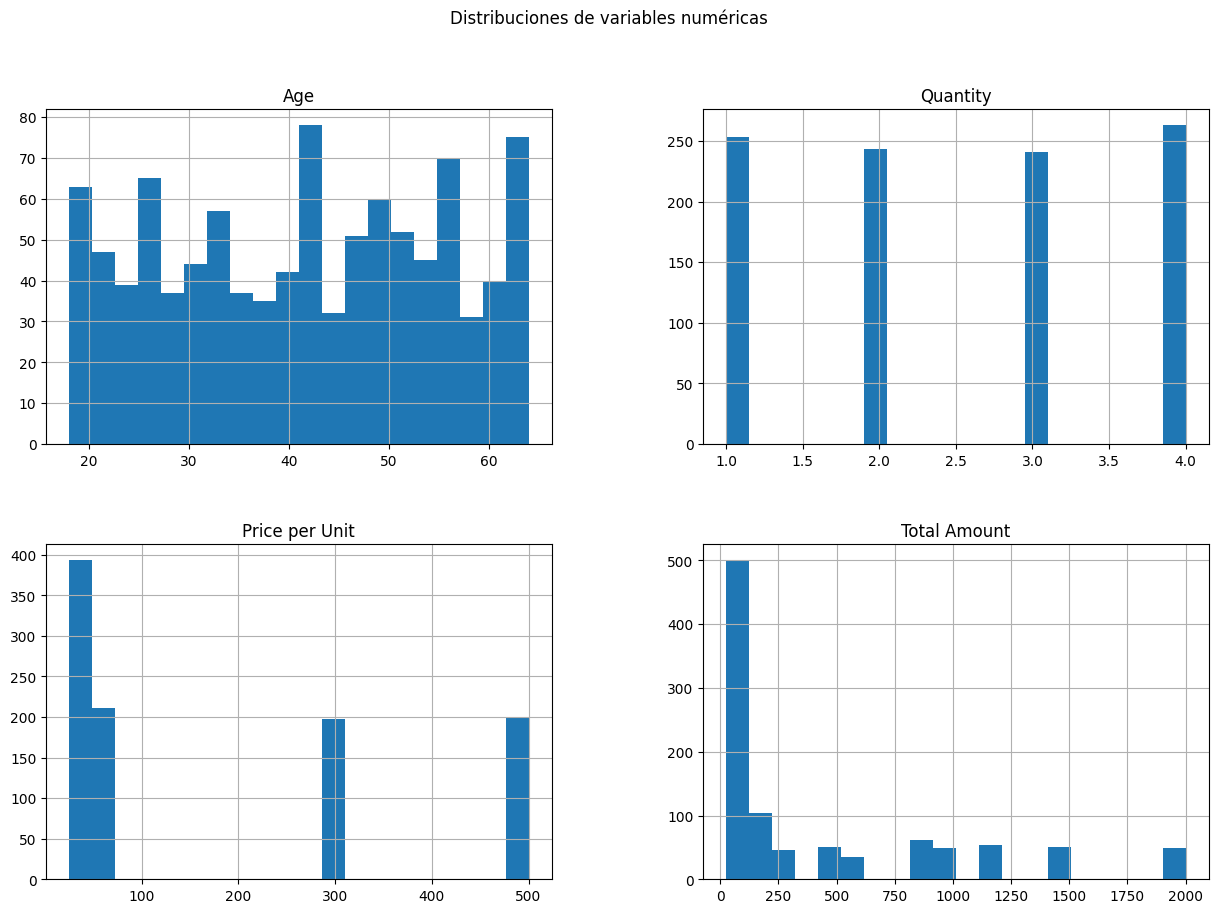

In [48]:
num_vars = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
df[num_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribuciones de variables numéricas")
plt.show()

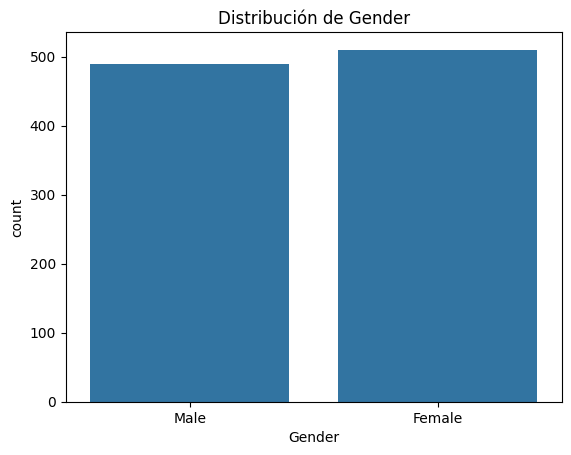

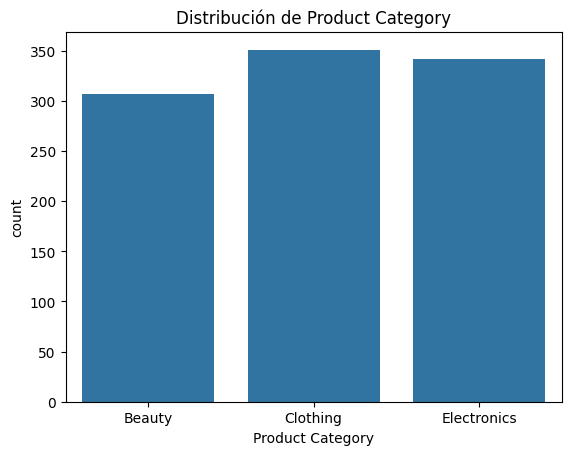

In [49]:
# Variables categóricas
cat_vars = ['Gender', 'Product Category']
for col in cat_vars:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.show()

In [50]:
print("\n--- Valores nulos por columna ---")
print(df.isnull().sum())


--- Valores nulos por columna ---
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [51]:

# Usaremos el rango intercuartil (IQR)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for col in num_vars:
    outliers = detect_outliers_iqr(df, col)
    print(f"\n--- Outliers detectados en {col}: {len(outliers)} ---")
    print(outliers)


--- Outliers detectados en Age: 0 ---
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

--- Outliers detectados en Quantity: 0 ---
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

--- Outliers detectados en Price per Unit: 0 ---
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []

--- Outliers detectados en Total Amount: 0 ---
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


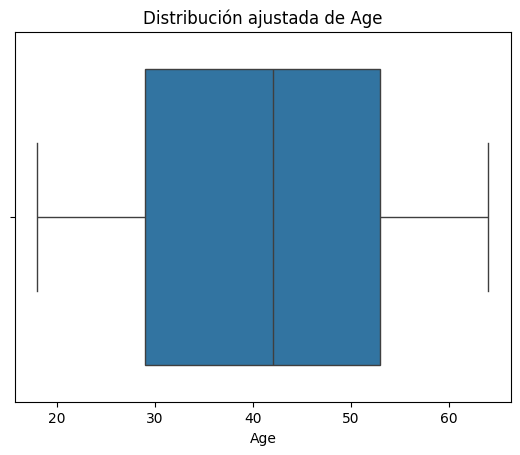

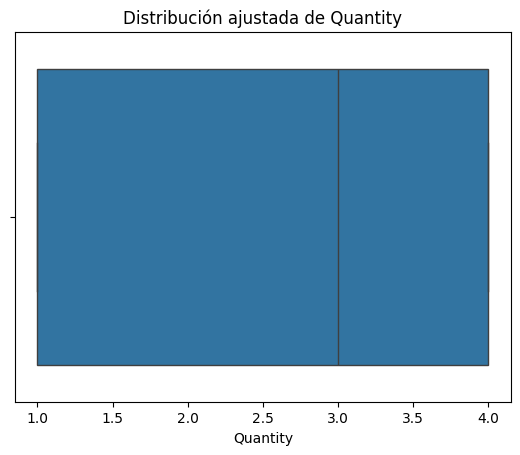

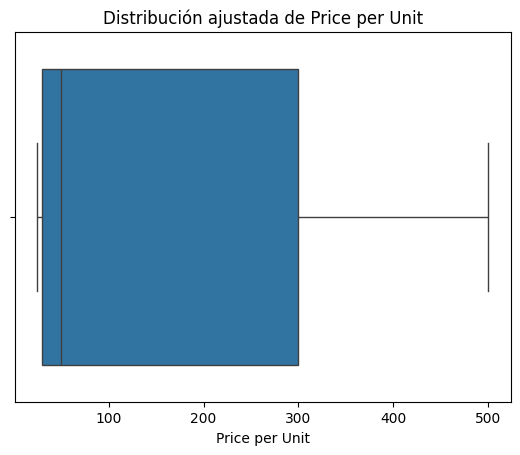

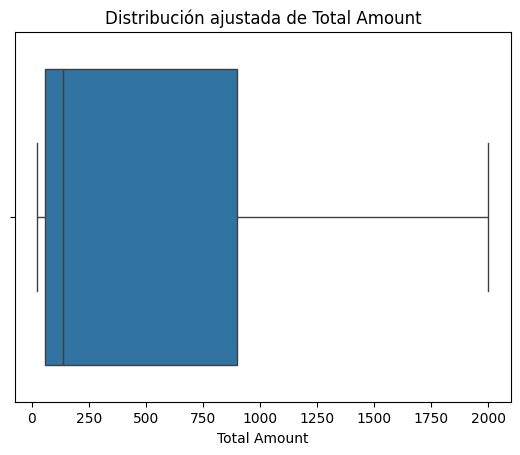

In [52]:
for col in num_vars:
    sns.boxplot(data=df, x=col)
    plt.title(f"Distribución ajustada de {col}")
    plt.show()

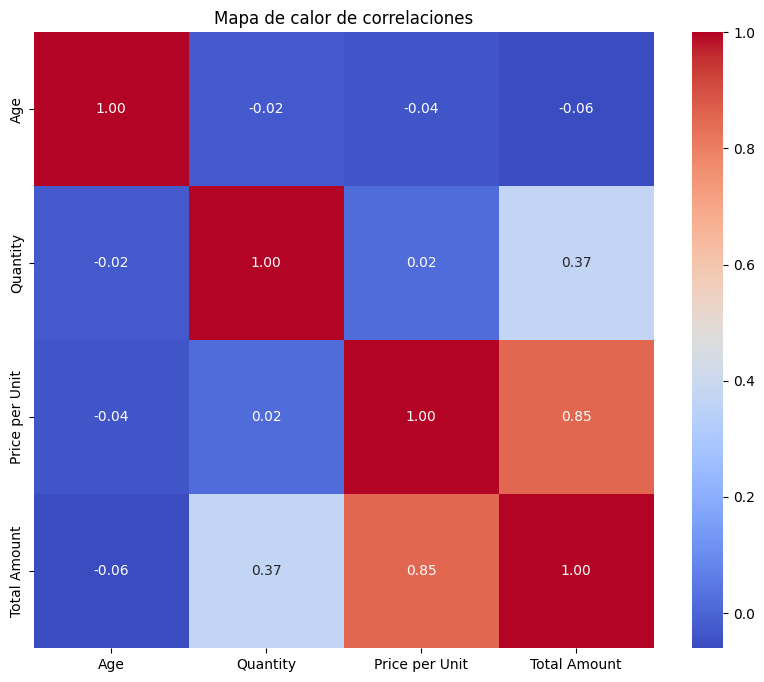

In [53]:
correlation_matrix = df[num_vars].corr()

# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


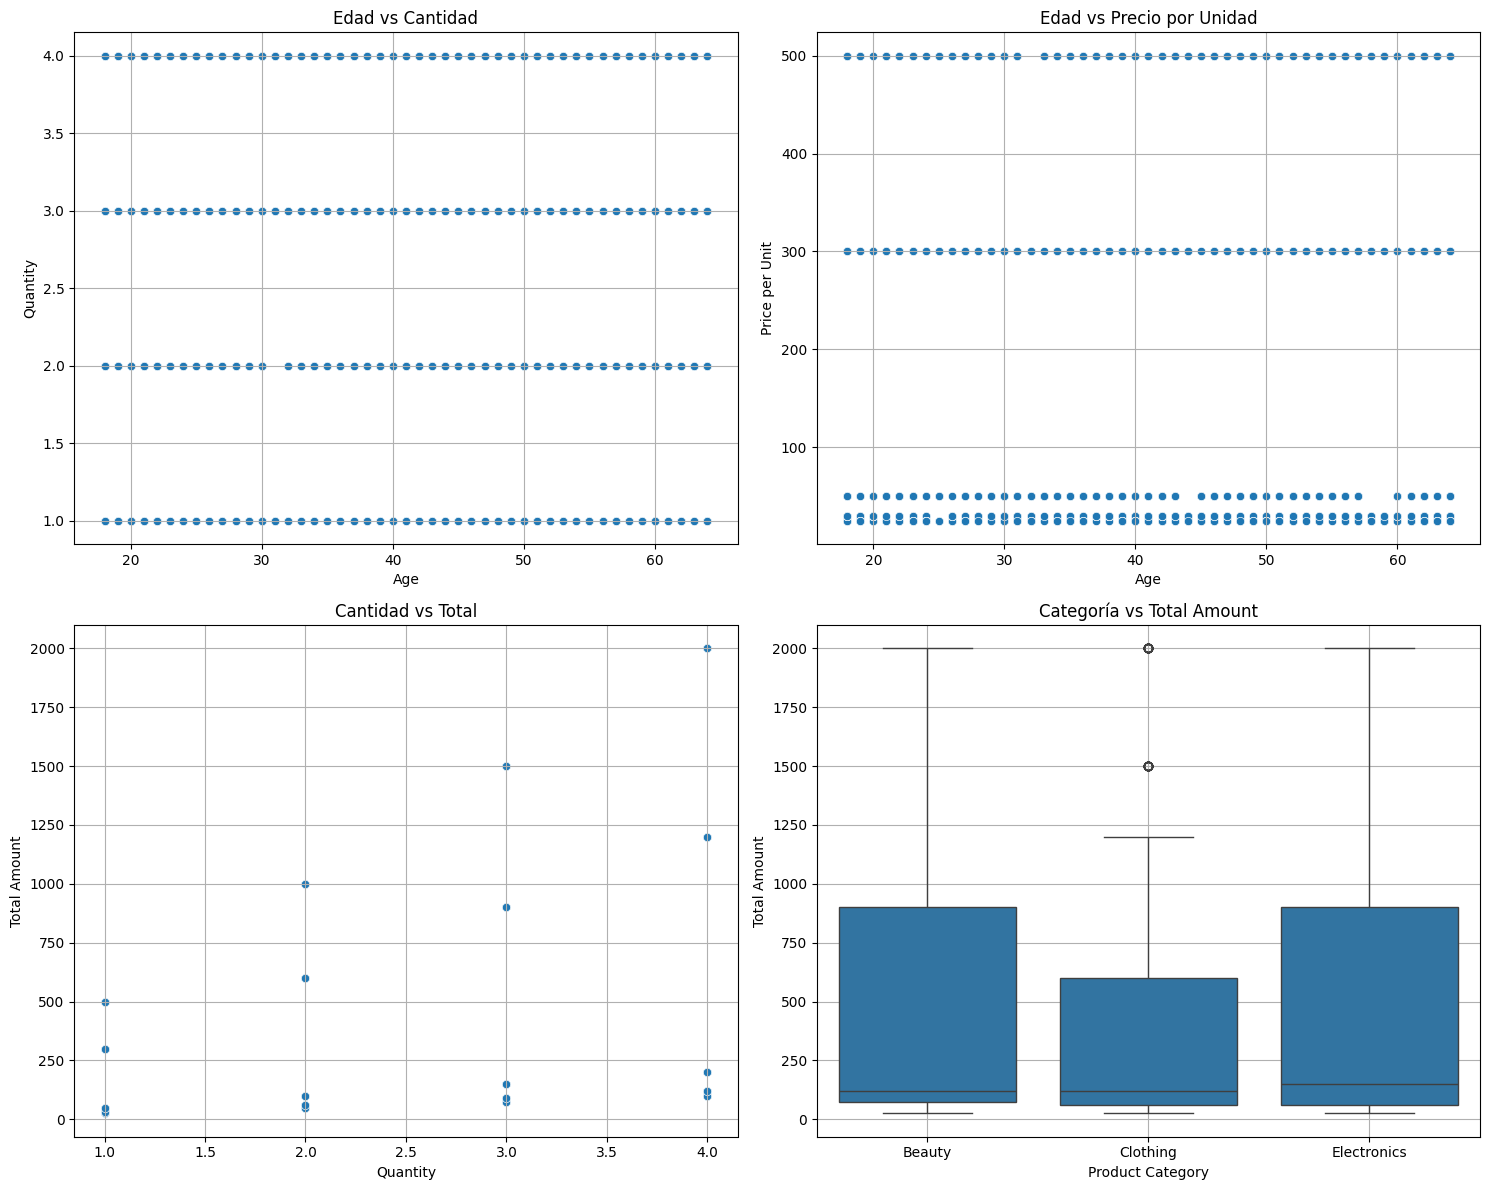

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Primer subplot: Relación entre Edad y Cantidad
sns.scatterplot(ax=axes[0, 0], data=df, x='Age', y='Quantity')
axes[0, 0].set_title("Edad vs Cantidad")
axes[0, 0].grid(True)
axes[0, 0].annotate('Ejemplo', xy=(30, 10), xytext=(40, 15),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))
# Segundo subplot: Relación entre Edad y Precio por Unidad
sns.scatterplot(ax=axes[0, 1], data=df, x='Age', y='Price per Unit')
axes[0, 1].set_title("Edad vs Precio por Unidad")
axes[0, 1].grid(True)

# Tercer subplot: Relación entre Cantidad y Total
sns.scatterplot(ax=axes[1, 0], data=df, x='Quantity', y='Total Amount')
axes[1, 0].set_title("Cantidad vs Total")
axes[1, 0].grid(True)
axes[1, 0].annotate('Outlier manejado', xy=(50, 1000), xytext=(30, 1200),
                    arrowprops=dict(facecolor='red', arrowstyle='->'))

# Cuarto subplot: Distribución de Total Amount por Categoría
sns.boxplot(ax=axes[1, 1], data=df, x='Product Category', y='Total Amount')
axes[1, 1].set_title("Categoría vs Total Amount")
axes[1, 1].grid(True)

fig.tight_layout()
plt.legend([], [], frameon=False)  # Eliminar leyendas redundantes
plt.show()

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ]
)

# Aplicar las transformaciones
transformed_data = preprocessor.fit_transform(df)
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
categorical_features = ['Gender', 'Product Category']

# Preprocesamiento de las columnas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Normalizar los datos numéricos
])

# Preprocesamiento de las columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convertir categorías a variables dummy
])

# Crear un preprocesador que aplique los transformadores correspondientes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('Total Amount', axis=1)  # Características
y = df['Total Amount']  # Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
